# Regressão Linear
Neste caderno, examinaremos os algoritmos de regressão linear. Aplicaremos esses algoritmos para resolver um conjunto de dados.

Material de referencia:
- https://matheusfacure.github.io/2017/02/15/MQO-formula-analitica/
- https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf

## Setup

In [ ]:
!pip install -q sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(0.0, 6.0, 0.0, 20.0)

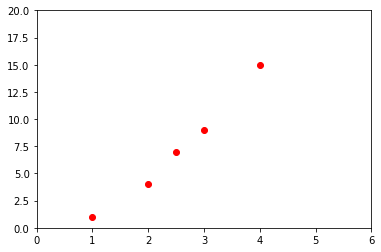

In [ ]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

Podemos ver que esses dados têm uma co-resposta linear. Quando o valor de x aumenta, o mesmo acontece com y. Devido a essa relação, podemos criar uma linha de melhor ajuste para esse conjunto de dados. Neste exemplo, nossa linha usará apenas uma variável de entrada, pois estamos trabalhando com duas dimensões. Em conjuntos de dados maiores, com mais recursos, nossa linha terá mais recursos e entradas.

Para relembrar a equação de uma reta em um plano 2D:

$ y = mx + b $

A seguir o exemplo da linha para conjunto de dados proposto

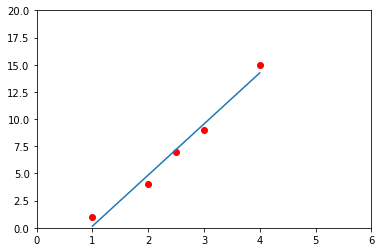

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

Depois de gerar essa linha para o nosso conjunto de dados, podemos usar sua equação para prever valores futuros. Apenas passamos os recursos do ponto de dados que gostaríamos de prever na equação da linha e usamos a saída como nossa previsão.

## Fundamentação Matematica

Podemos definir Cada linha como uma observação. sendo *y* a variavel dependente que queremos prever a partir das variaveis independentes *x*. Nosso objetivo é aprender como chegar das variáveis independentes na variável dependente, ou, em outras palavras, prever y a partir de X. 
Sendo X uma matriz $n_Xd$, em que n é o número de observações e d o número de dimensões; *y* é um vetor coluna $n_x 1$. Podemos definir o problema como um sistema de equações em que cada equação é uma observação:
\begin{cases}
w_0 + w_1 x_1 + ... + w_d x_1 = y_1 \\
w_0 + w_1 x_2 + ... + w_d x_2 = y_2 \\
... \\
w_0 + w_1 x_n + ... + w_d x_n = y_n \\
\end{cases}

Para lidar com esse problema, vamos adicionar nas equações um termo erro ε que representará os fatores que não conseguimos observar, erros de medição, etc.
Portanto podemos rescrever de forma matricial:

$X_{nd} {w}_{d1} + {\epsilon}_{n1} = {y}_{n1}$

Para estimar a equação acima, usaremos a técnica de Mínimos Quadrados Ordinários (MQO):

Podemos encarar o problema como uma minimização da função custo $L = {\epsilon}^T {\epsilon}$

Portanto nossa função pode ser reescrita:

${\epsilon}^T  {\epsilon} = ({y} - {\hat{w}}X)^T({y} - {\hat{w}} X) \\= {y}^T {y} - {\hat{w}}^T X^T {y} - {y}^T X {\hat{w}} + {\hat{w}} X^T X {\hat{w}} \\= {y}^T {y} - 2{\hat{w}}^T X^T {y} + {\hat{w}} X^T X {\hat{w}}$

Para encontrar o ponto de minimo iremos calcular a derivada do custo em relação aos parametros $w$

$\frac{\partial {\epsilon}^T {\epsilon}}{\partial {\hat{w}}} = -2X^T{y} + 2X^T X {\hat{w}} = 0$

Derivando mais uma vez para checar se o ponto é minimo chegamos em $2X^TX$, que é positiva definida se as colunas de $X$ forem independentes.


Portanto o custo do erro será minimo quando:

${\hat{w}} = (X^T X)^{-1} X^T {y}$


In [ ]:
# w_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

## Dataset

O conjunto de dados que focaremos aqui é o conjunto de dados Boston house prices consiste de 506 amostras contendo 13 atributos relacionando o valor medio da casa($1000). Nosso primeiro passo é sempre entender os dados e explorá-los.

Atributos:
- CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS: proportion of non-retail business acres per town

- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX: nitric oxides concentration (parts per 10 million)

- RM: average number of rooms per dwelling

- AGE: proportion of owner-occupied units built prior to 1940

- DIS: weighted distances to five Boston employment centres

- RAD: index of accessibility to radial highways

- TAX: full-value property-tax rate per $10,000

- PTRATIO: pupil-teacher ratio by town

- B: $1000*(B_{k} - 0.63)^2$ where $B_{k}$ is the proportion of blacks by town

- LSTAT: % lower status of the population

Finalmente o valor que esperamos modelar: 
- MEDV: Median value of owner-occupied homes in $1000’s




In [ ]:
from sklearn.datasets import load_boston # para carregar os dados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o modelo
from sklearn.metrics import mean_squared_error,mean_absolute_error # importa o modelo

# carrega os dados
boston_data = load_boston()
X = boston_data.data
y = boston_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Para analisar os dados, usaremos o método .head () do pandas. Isso nos mostrará os 5 primeiros itens em nosso dataframe.

In [ ]:
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['MEDV'] = boston_data.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Analisando conjunto de dados

Se quisermos uma análise mais estatística de nossos dados, podemos usar o método .describe

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Vamos agora analisar mais em detalhes as caracteristicas do conjuto de dados

## Visualização da distribuição dos atributos entre espécies 

<Figure size 432x288 with 0 Axes>

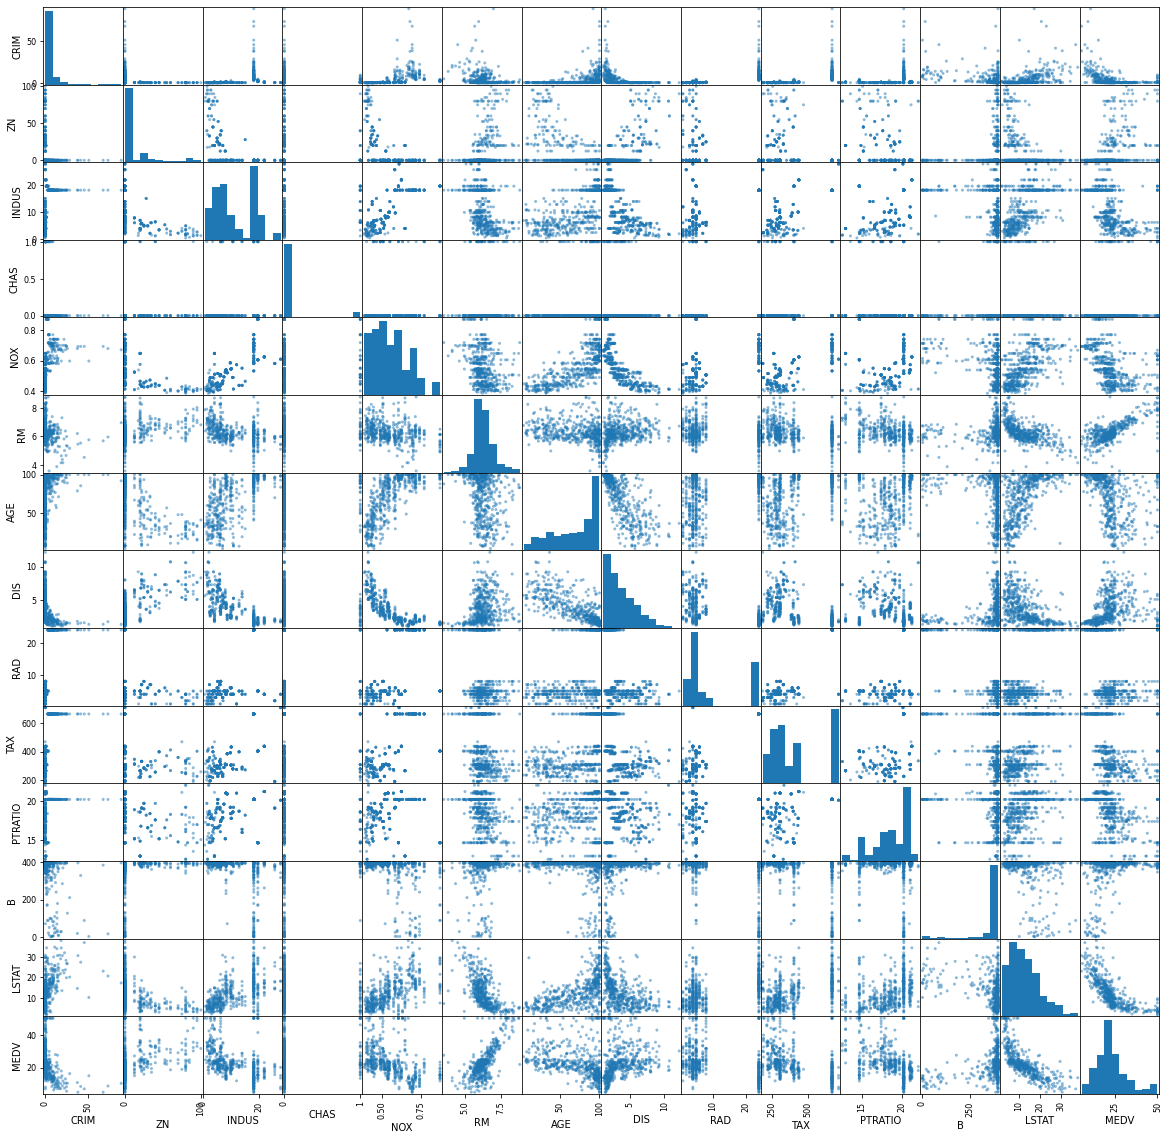

<Figure size 432x288 with 0 Axes>

In [ ]:
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.figure()

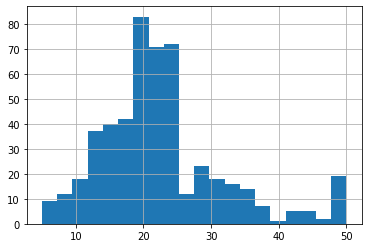

In [ ]:
df.MEDV.hist(bins=20)

## Utilização do algoritmo no conjunto de dados

In [ ]:
reg = LinearRegression() # cria o modelo
reg.fit(X_train, y_train) # treina o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.75
R2 no set de teste: 0.67


## Comparação visual



Text(0, 0.5, 'Preço Previsto ($1000s)')

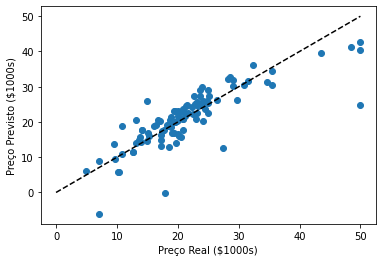

In [ ]:
prediction = reg.predict(X_test)
plt.scatter(y_test, prediction)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Preço Real ($1000s)')
plt.ylabel('Preço Previsto ($1000s)')

In [ ]:
print('MSE:', mean_squared_error(y_test, prediction))
print('MAE:', mean_absolute_error(y_test, prediction))

MSE: 24.291119474973616
MAE: 3.189091965887853


In [ ]:
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted':prediction})
df_comp = df_comp.head(20)

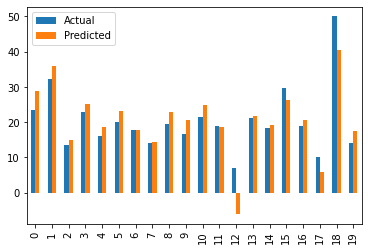

In [ ]:
df_comp.plot(kind = 'bar')

### Próximas etapas 

- Podemos melhorar o resultado trabalhando o conceito de regularização [(link)](https://towardsdatascience.com/predicting-boston-house-prices-using-linear-regression-3c6107c662e5).
- Testar outros metodos de regressão ex: Árvore de decisão, regressão polinomial, Máquina de vetores de suporte....